# Problem 7: Visualization

In [2]:
from matplotlib import pyplot
import numpy as np

Mean of player1_home:  54.26327323943662
Standard deviation of player1_home:  16.70600555135667
Mean of player2_home:  54.26734110478873
Standard deviation of player2_home:  16.709809263922967


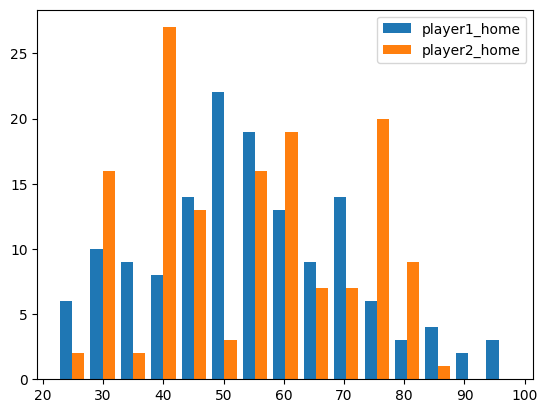

In [3]:
data = np.genfromtxt(open("fantasy.csv", "r"), delimiter=" ", skip_header=1)
data = np.delete(data, 0, axis = 1)
columns = np.array(["player1_home","player1_away","player2_home","player2_away"])

p1_h_mean = np.mean(data[:,0])
print("Mean of player1_home: ", p1_h_mean)

p1_h_sd = np.std(data[:,0])
print("Standard deviation of player1_home: ", p1_h_sd)

p2_h_mean = np.mean(data[:,2])
print("Mean of player2_home: ", p2_h_mean)

p2_h_sd = np.std(data[:,2])
print("Standard deviation of player2_home: ", p2_h_sd)

pyplot.hist(data[:, [0, 2]], bins=15, label=columns[[0, 2]])
pyplot.legend(loc='upper right')
pyplot.show()

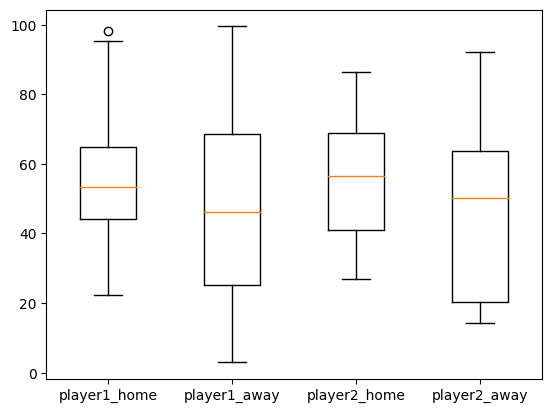

In [4]:
pyplot.boxplot(data, labels=columns)
pyplot.show()

# Problem 9: Babylon vs Dark

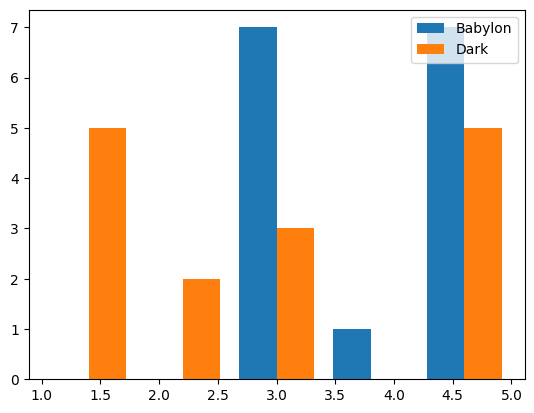

In [5]:
babylon_scores = np.array([3, 4.5, 5, 5, 3, 3, 3, 3, 4.5, 4.5, 4.5, 4, 3, 3,5])
dark_scores = np.array([2, 4.5, 3, 1, 2, 3, 5, 5, 5, 5, 3, 1, 1, 1, 1])

pyplot.hist([babylon_scores, dark_scores], bins=5, label=["Babylon", "Dark"])
pyplot.legend(loc='upper right')
pyplot.show()

In [6]:
# Perform Mann-Whitney Test
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(babylon_scores, dark_scores)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpretation
# As p > alpha=0.05, we fail to reject the null hypothesis that the two samples are drawn from the same distribution.

Statistics=150.500, p=0.109


# Problem 11: Multiple Testing

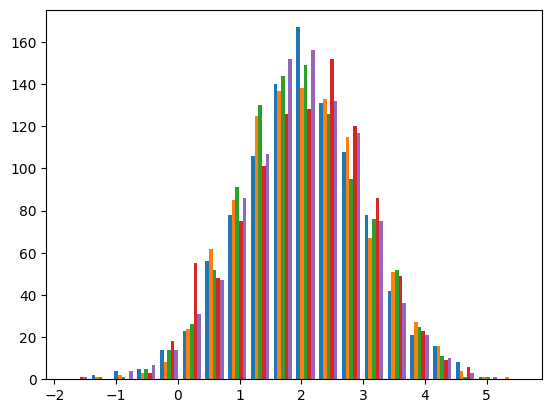

In [21]:
np.random.seed(123)

alpha = 0.05
n = 1000
mu_1 = 2
mu_2 = 2
mu_3 = 4
sigma = 1

sample_1 = np.random.normal(mu_1, sigma, (n, 5))
sample_2 = np.random.normal(mu_2, sigma, (n, 5))
sample_3 = np.random.normal(mu_3, sigma, (n, 5))
sample_4 = np.concatenate((np.random.normal(mu_2, sigma, (n//2, 5)), np.random.normal(mu_3, sigma, (n//2, 5))), axis=0)

pyplot.hist(sample_1, bins=20, label="Sample 1")
pyplot.show()

In [22]:
print(sample_4)
# sample_4 = np.append(np.random.normal(mu_2, sigma, (int(n/2), 5)), np.random.normal(mu_3, sigma, (int(n/2), 5)))

[[2.90756418 3.68521718 0.8836907  2.15357373 2.05575302]
 [1.49145337 1.59117906 1.93360829 2.81445104 2.07029605]
 [1.99900606 3.09075965 4.58996556 0.99827433 1.81972917]
 ...
 [4.19607406 4.01666979 4.11978233 2.80360068 6.86473424]
 [4.90859663 4.720665   4.4094029  4.47872644 4.83706369]
 [3.05274571 3.74138897 2.59716018 5.04454086 4.36928112]]


In [23]:
# two sided t-test for no_difference(sample_1, sample_2), difference(sample_1, sample_3), mixed(sample_1, sample_4)
from scipy.stats import ttest_ind
stat_nd, p_nd = ttest_ind(sample_1, sample_2, axis=1)
stat_d, p_d = ttest_ind(sample_1, sample_3, axis=1)
stat_m, p_m = ttest_ind(sample_1, sample_4, axis=1)

# same for mann-whitney test
from scipy.stats import mannwhitneyu
stat_nd_m, p_nd_m = mannwhitneyu(sample_1, sample_2, axis=1)
stat_d_m, p_d_m = mannwhitneyu(sample_1, sample_3, axis=1)
stat_m_m, p_m_m = mannwhitneyu(sample_1, sample_4, axis=1)


In [24]:
# How many significant test results did we get?
print("Number of significant results for no difference: ", np.sum(p_nd < alpha))
print("Number of significant results for difference: ", np.sum(p_d < alpha))
print("Number of significant results for mixed: ", np.sum(p_m < alpha))

# How many significant test results did we get?
print("Number of significant results for no difference: ", np.sum(p_nd_m < alpha))
print("Number of significant results for difference: ", np.sum(p_d_m < alpha))
print("Number of significant results for mixed: ", np.sum(p_m_m < alpha))


Number of significant results for no difference:  61
Number of significant results for difference:  804
Number of significant results for mixed:  415
Number of significant results for no difference:  32
Number of significant results for difference:  700
Number of significant results for mixed:  342


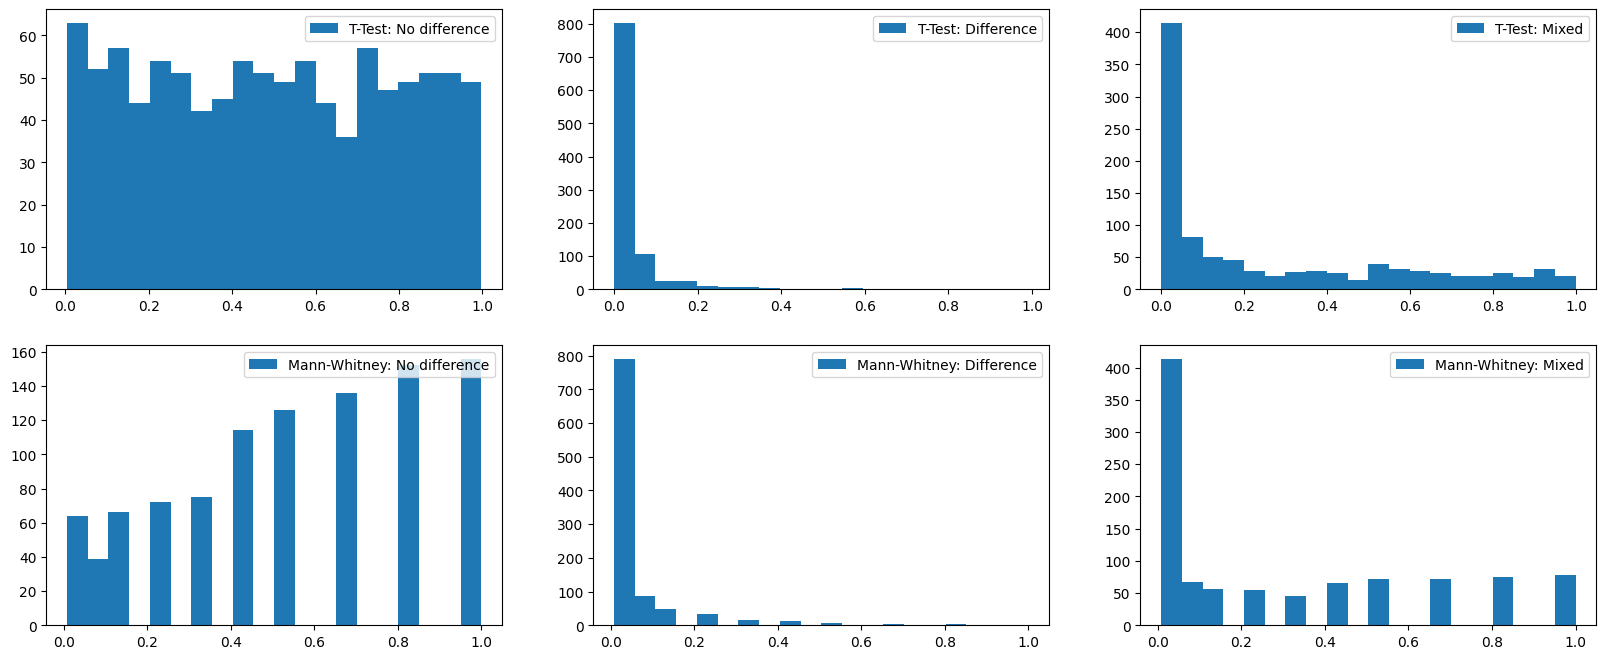

In [36]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6))  = pyplot.subplots(2,3, figsize=(20,8))
ax1.hist(p_nd, bins=20, label="T-Test: No difference")
ax2.hist(p_d, bins=20, label="T-Test: Difference")
ax3.hist(p_m, bins=20, label="T-Test: Mixed")
ax1.legend(loc='upper right')
ax2.legend(loc='upper right')
ax3.legend(loc='upper right')

ax4.hist(p_nd_m, bins=20, label="Mann-Whitney: No difference")
ax5.hist(p_d_m, bins=20, label="Mann-Whitney: Difference")
ax6.hist(p_m_m, bins=20, label="Mann-Whitney: Mixed")
ax4.legend(loc='upper right')
ax5.legend(loc='upper right')
ax6.legend(loc='upper right')

pyplot.show()


In [50]:
t_false_positives = np.sum(p_nd < alpha)
mw_false_positives = np.sum(p_nd_m < alpha)

t_false_negatives = np.sum(p_d > alpha)
mw_false_negatives = np.sum(p_d_m > alpha)

print("Number of false positives for t-test: ", t_false_positives)
print("Number of false positives for mann-whitney: ", mw_false_positives)

print("Number of false negatives for t-test: ", t_false_negatives)
print("Number of false negatives for mann-whitney: ", mw_false_negatives)

Number of false positives for t-test:  61
Number of false positives for mann-whitney:  32
Number of false negatives for t-test:  196
Number of false negatives for mann-whitney:  300


In [51]:
# For mixed:

tm_false_positives = np.sum(p_m[:500] < alpha)
tm_false_negatives = np.sum(p_m[500:] > alpha)

mwm_false_positives = np.sum(p_m_m[:500] < alpha)
mwm_false_negatives = np.sum(p_m_m[500:] > alpha)

print("Number of false positives for t-test: ", tm_false_positives)
print("Number of false positives for mann-whitney: ", mwm_false_positives)

print("Number of false negatives for t-test: ", tm_false_negatives)
print("Number of false negatives for mann-whitney: ", mwm_false_negatives)

Number of false positives for t-test:  27
Number of false positives for mann-whitney:  19
Number of false negatives for t-test:  112
Number of false negatives for mann-whitney:  177


In [52]:
# apply bonferroni correction
alpha_bonf = alpha / n

# How many significant test results did we get?
print("Number of significant results for no difference: ", np.sum(p_nd < alpha_bonf))
print("Number of significant results for difference: ", np.sum(p_d < alpha_bonf))
print("Number of significant results for mixed: ", np.sum(p_m < alpha_bonf))

# How many significant test results did we get?
print("Number of significant results for no difference: ", np.sum(p_nd_m < alpha_bonf))
print("Number of significant results for difference: ", np.sum(p_d_m < alpha_bonf))
print("Number of significant results for mixed: ", np.sum(p_m_m < alpha_bonf))

Number of significant results for no difference:  0
Number of significant results for difference:  12
Number of significant results for mixed:  10
Number of significant results for no difference:  0
Number of significant results for difference:  0
Number of significant results for mixed:  0


In [53]:
b_t_false_positives = np.sum(p_nd < alpha_bonf)
b_mw_false_positives = np.sum(p_nd_m < alpha_bonf)

b_t_false_negatives = np.sum(p_d > alpha_bonf)
b_mw_false_negatives = np.sum(p_d_m > alpha_bonf)

print("Number of false positives for t-test: ", b_t_false_positives)
print("Number of false positives for mann-whitney: ", b_mw_false_positives)

print("Number of false negatives for t-test: ", b_t_false_negatives)
print("Number of false negatives for mann-whitney: ", b_mw_false_negatives)

# For mixed:

b_tm_false_positives = np.sum(p_m[:500] < alpha_bonf)
b_tm_false_negatives = np.sum(p_m[500:] > alpha_bonf)

b_mwm_false_positives = np.sum(p_m_m[:500] < alpha_bonf)
b_mwm_false_negatives = np.sum(p_m_m[500:] > alpha_bonf)

print("Number of false positives for t-test: ", b_tm_false_positives)
print("Number of false positives for mann-whitney: ", b_mwm_false_positives)

print("Number of false negatives for t-test: ", b_tm_false_negatives)
print("Number of false negatives for mann-whitney: ", b_mwm_false_negatives)

Number of false positives for t-test:  0
Number of false positives for mann-whitney:  0
Number of false negatives for t-test:  988
Number of false negatives for mann-whitney:  1000
Number of false positives for t-test:  0
Number of false positives for mann-whitney:  0
Number of false negatives for t-test:  490
Number of false negatives for mann-whitney:  500
